# <p style="text-align:center;">**Entrega n°2, Camino B**</p>
### <p style="text-align:center;">Sebastián y Vicente Ramírez.</p>
### <p style="text-align:center;">Pasos iniciales.</p>
#### Importación de librerías.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import itertools as it
import warnings

# Para una visualización más limpia (esta parte del código se con todo estructurado)
# para evitar ignorar los warnings necesarios durante el proceso de desarrollo
warnings.filterwarnings("ignore")

# Configuración pandas
pd.set_option('display.max_columns', None)

#### Apertura y resumen del dataset.
En parquet, debido a que se hizo en la taréa anterior.

In [2]:
df = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet", engine="pyarrow")

#Información principal de df y primeras observaciones
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1038754 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1038715 non-null  object 
 3   FECHA_NACIMIENTO     1038744 non-null  object 
 4   SERVICIO_SALUD       1038013 non-null  object 
 5   TIPO_INGRESO         1038699 non-null  object 
 6   FECHA_INGRESO        1038754 non-null  object 
 7   FECHAALTA            1038754 non-null  object 
 8   TIPOALTA             1038754 non-null  object 
 9   DIAGNOSTICO1         1038754 non-null  object 
 10  IR_29301_COD_GRD     1038754 non-null  float64
 11  IR_29301_PESO        1038754 non-null  float64
 12  IR_29301_SEVERIDAD   1038754 non-null  float64
 13  IR_29301_MORTALIDAD  1038754 non-null  float64
 14  EDAD                 1038744 non-null  float64
 15  DIA

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Versión,Descripción,Categoría,Sección,Capítulo,DESCRIPCION_GRD,peso_categoria
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),CIE-v2013,Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,MH INFECCIONES GASTROINTESTINALES MAYORES,Medio-Bajo
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,Medio
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Neumonía debida a virus sincitial respiratorio,"J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE",J09-J18 GRIPE Y NEUMONÍA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH NEUMONÍA SIMPLE Y TOS FERINA,Bajo
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Incontinencia urinaria por tensión,N39 OTROS TRASTORNOS DEL SISTEMA URINARIO,N30-N39 OTRAS ENFERMEDADES DEL APARATO URINARIO,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,Medio-Bajo
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Ictericia no especificada,R17 ICTERICIA NO ESPECIFICADA,R10-R19 SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...,"Cap.18 SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...","MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",Medio-Bajo


#### Eliminar columnas que no se consideran necesarias. (O repetitivas).
Las columnas:
- 0
- 3
- De la 6 a la 8
- De la 10 a la 13
- 17
- 19 en adelante

In [ ]:
# Drop de la selección
df = df.drop(np.array(df.columns)[[0, 3, 6, 7, 8, 10, 11, 12, 13, 17, 19, 20, 21, 22, 23]], axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   CIP_ENCRIPTADO  1037121 non-null  float64
 1   SEXO            1038715 non-null  object 
 2   SERVICIO_SALUD  1038013 non-null  object 
 3   TIPO_INGRESO    1038699 non-null  object 
 4   DIAGNOSTICO1    1038754 non-null  object 
 5   EDAD            1038744 non-null  float64
 6   DIAS_ESTANCIA   1038754 non-null  int64  
 7   HOSPITAL        1038754 non-null  object 
 8   Descripción     1038722 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 79.3+ MB


### <p style="text-align:center;">Análisis variable objetivo (Días estancia) </p>


In [ ]:
array = np.array(df["DIAS_ESTANCIA"]) # Transformación a array para poder usar funciones de numpy
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              0
10%:                 0.0
25%:                 1.0
Mediana:             2.0
75%:                 6.0
90%:                 14.0
Máximo:              696
Promedio:            5.8
Desviación Estandar: 12.35

---------------------------------------------------------------------------



Debido a la diferencia entre el percentil 90 y el máximo, se realiza un análisis más profundo.

In [189]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA:')
print('\n---------------------------------------------------------------------------\n')
print(f'91%:                 {np.nanpercentile(array, 91)}')
print(f'92%:                 {np.nanpercentile(array, 92)}')
print(f'93%:                 {np.nanpercentile(array, 93)}')
print(f'94%:                 {np.nanpercentile(array, 94)}')
print(f'95%:                 {np.nanpercentile(array, 95)}')
print(f'96%:                 {np.nanpercentile(array, 96)}')
print(f'97%:                 {np.nanpercentile(array, 97)}')
print(f'98%:                 {np.nanpercentile(array, 98)}')
print(f'99%:                 {np.nanpercentile(array, 99)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA:

---------------------------------------------------------------------------

91%:                 15.0
92%:                 16.0
93%:                 18.0
94%:                 20.0
95%:                 22.0
96%:                 25.0
97%:                 30.0
98%:                 37.0
99%:                 53.0

---------------------------------------------------------------------------



### <p style="text-align:center;">Limpieza segun recomendaciones</p>
Como se ve anteriormente, el último 9% de los días de estancia comienza a dispararse, por ende, se considerarán outliers y se eliminaran. Además, debido a que nuestro objetivo es predecir los días de estancia, no se considerarán consultas ambulatorias (0 días de estancia).

In [190]:
# Quitar días de estancia = 0 ó días de estancia > 15.
df = df[(df['DIAS_ESTANCIA'] > 0) & (df['DIAS_ESTANCIA'] <= 15)]
len(df)

728526


### <p style="text-align:center;">Manejo de nulos</p>
Primero, se revisan cuales variables tienen nulos, y en caso de tener, se calcula la proporción de nulos respecto al total de datos.

In [191]:
for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(f'Variable: {var}')
        print(f'Número de nulos: {df[var].isnull().sum()}')
        print(f'Porcentaje de nulos: {round((df[var].isnull().sum()/len(df))*100, 2)}%')
        print('\n---------------------------------------------------------------------------\n')

Variable: CIP_ENCRIPTADO
Número de nulos: 1341
Porcentaje de nulos: 0.18%

---------------------------------------------------------------------------

Variable: SEXO
Número de nulos: 29
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: SERVICIO_SALUD
Número de nulos: 633
Porcentaje de nulos: 0.09%

---------------------------------------------------------------------------

Variable: TIPO_INGRESO
Número de nulos: 42
Porcentaje de nulos: 0.01%

---------------------------------------------------------------------------

Variable: EDAD
Número de nulos: 4
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: Descripción
Número de nulos: 30
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------



Debido a que la cantidad de nulos es menos de un 1% por variable, se eliminan sin generar un cambio significativo.

In [192]:
df.dropna(inplace=True)
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726448 entries, 0 to 1039586
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CIP_ENCRIPTADO  726448 non-null  float64
 1   SEXO            726448 non-null  object 
 2   SERVICIO_SALUD  726448 non-null  object 
 3   TIPO_INGRESO    726448 non-null  object 
 4   DIAGNOSTICO1    726448 non-null  object 
 5   EDAD            726448 non-null  float64
 6   DIAS_ESTANCIA   726448 non-null  int64  
 7   HOSPITAL        726448 non-null  object 
 8   Descripción     726448 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 55.4+ MB


#### Filtrar por la región metropolitana

In [193]:
df = df[df["SERVICIO_SALUD"].str.contains("METROPOLITANO")]
df

,SEXO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Descripción,peso_categoria
1,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,Otros tipos de neumotórax espontáneo,Medio
2,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,Neumonía debida a virus sincitial respiratorio,Bajo
31,HOMBRE,METROPOLITANO ORIENTE,PROGRAMADA,2023-08-09,2023-08-10,DOMICILIO,2.0,1.0,11.0,1,Hospital de Niños Dr. Luis Calvo Mackenna (Sa...,Fisura del paladar duro y del paladar blando c...,Medio
32,MUJER,METROPOLITANO SURORIENTE,OBSTETRICA,2023-08-28,2023-08-30,DOMICILIO,1.0,1.0,23.0,2,Hospital Clínico Metropolitano La Florida Dra...,Parto por cesárea de emergencia,Bajo
64,HOMBRE,METROPOLITANO CENTRAL,URGENCIA,2023-07-31,2023-08-04,DOMICILIO,1.0,1.0,47.0,4,Hospital de Urgencia Asistencia Pública Dr. A...,Cálculo de conducto biliar con colangitis,Medio-Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039556,MUJER,METROPOLITANO ORIENTE,PROGRAMADA,2023-05-31,2023-06-01,DOMICILIO,1.0,1.0,15.0,1,Hospital de Niños Dr. Luis Calvo Mackenna (Sa...,Luxación y subluxación recidivante de la artic...,Medio
1039561,MUJER,METROPOLITANO CENTRAL,URGENCIA,2023-08-15,2023-08-21,DOMICILIO,1.0,1.0,11.0,6,Hospital Clínico San Borja-Arriarán (Santiago...,Celulitis de otras partes de los miembros,Bajo
1039566,MUJER,METROPOLITANO NORTE,PROGRAMADA,2023-09-26,2023-09-27,DOMICILIO,1.0,1.0,3.0,1,Hospital Clínico de Niños Dr. Roberto del Río...,Tumor benigno de la laringe,Medio
1039570,MUJER,METROPOLITANO SURORIENTE,PROGRAMADA,2023-09-22,2023-09-23,DOMICILIO,1.0,1.0,69.0,1,Hospital Padre Alberto Hurtado (San Ramón),Cálculo de la vesícula biliar con otra colecis...,Medio


#### Agrupación de edades (creación de grupos etarios)
Con las siguientes categorías (respecto a las edades):
- Infante (< 1)
- Niño (de 1 a 11)
- Adolescente (12 a 17)
- Adulto Joven (18 a 29)
- Adulto (30 a 64)
- Adulto Mayor (>65)

In [ ]:
def clasificar_edad(edad):
    if edad < 1:
        return "Infante"
    elif 1 <= edad <= 11:
        return "Niño"
    elif 12 <= edad <= 17:
        return "Adolescente"
    elif 18 <= edad <= 29:
        return "Adulto"
    elif 30 <= edad <= 64:
        return "Adulto"
    else:
        return "Adulto mayor"

# Crear una nueva columna, aplicando las clasificaciones
df["Grupo Etario"] = df["EDAD"].apply(clasificar_edad)

#### Exportar a parquet, para futuras entregas.

In [ ]:
# Exportación a parquet, para futuros análisis.
df.to_parquet("GRD_2023_DESCRIPTIVE_CLEAN.parquet", engine="pyarrow", index=False)
# df.to_csv("GRD_2023_DESCRIPTIVE_CLEAN.csv", index=False)

## <p style="text-align:center;">Análisis profundo de las variables.</p>
#### Métricas principales de las variables elegidas.
- DIAS_ESTANCIA (Variable Objetivo)
- IR_29031_SEVERIDAD
- IR_29031_MORTALIDAD
- Descripción

#### 1. DIAS_ESTANCIA (De nuevo, por la eliminación de outliers).
- métricas

In [200]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              1
10%:                 1.0
25%:                 2.0
Mediana:             3.0
75%:                 6.0
90%:                 9.0
Máximo:              15
Promedio:            4.18
Desviación Estandar: 3.39

---------------------------------------------------------------------------



- Media por sexo

Promedio de DIAS_ESTANCIA por SEXO:
  SEXO  PROM_DIAS_ESTANCIA
HOMBRE            4.708314
 MUJER            3.856314


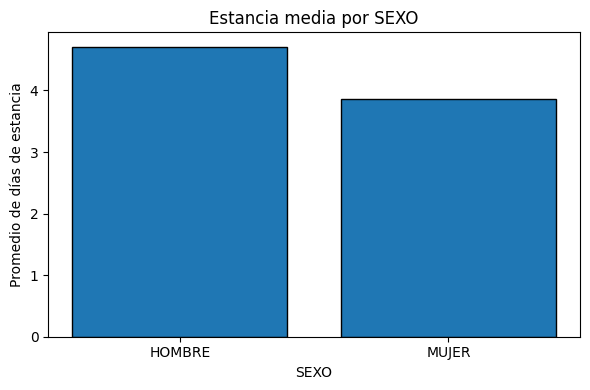

In [205]:
sexo_grp = (
    df
    .groupby('SEXO')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SEXO:")
print(sexo_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sexo_grp['SEXO'].astype(str), sexo_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SEXO')
plt.tight_layout()
plt.show()

En este caso, se puede observar una diferencia de tan solo 1 día en la media de días de estadía para hombres y mujeres, lo que no siguiere una diferencia significativa.

- Media por grupo etario

Promedio de DIAS_ESTANCIA por GRUPO_ETARIO:


,Grupo Etario,PROM_DIAS_ESTANCIA
2,Adulto mayor,5.217558
3,Infante,4.545234
4,Niño,3.929671
0,Adolescente,3.775684
1,Adulto,3.754715


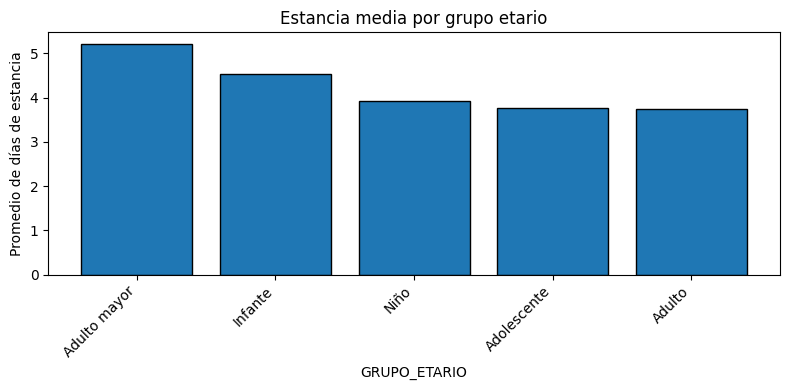

In [301]:
edad_grp = (
    df
    .groupby('Grupo Etario')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values(by="PROM_DIAS_ESTANCIA", ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por GRUPO_ETARIO:")
display(edad_grp)

# 3) Gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(edad_grp['Grupo Etario'].astype(str), edad_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('GRUPO_ETARIO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por grupo etario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En este caso, la diferencia entre los Adultos y los Adultos mayores es de más de un día y medio, lo que podría sugerir una diferencia significativa, pero no necesariamente (requiere de un futuro análisis más profundo)

- Media por descripción

Top 10 casos por promedio de estancia:


,Descripción,PROM_DIAS_ESTANCIA
3248,Otras malformaciones congénitas de la válvula ...,15.0
3930,Queratosis [queratodermia] palmar y plantar ad...,15.0
3331,"Otras osteonecrosis, otros",15.0
4519,Trastornos de las válvulas aórtica y tricúspide,15.0
2449,Linfoma de Hodgkin clásico con depleción linfo...,15.0
2728,Neumonía en enfermedades parasitarias,15.0
2487,Lupus eritematoso discoide,15.0
2352,Isquemia miocárdica transitoria del recién nacido,15.0
3256,Otras malformaciones congénitas de los tabique...,15.0
4288,Síndromes de compresión de la arteria espinal ...,15.0


Top 10 casos con menor promedio de estancia:


,Descripción,PROM_DIAS_ESTANCIA
2512,Luxación y subluxación recidivante de la artic...,1.0
2515,"Luxación, esguince o torcedura de articulación...",1.0
2479,"Longitud desigual de los miembros (adquirida),...",1.0
2480,"Longitud desigual de los miembros (adquirida),...",1.0
2483,Lumbago con ciática - Sitio no especificado,1.0
19,"Aborto no especificado, completo o no especifi...",1.0
4642,Traumatismo de la vena yugular interna,1.0
2509,Luxación del maxilar,1.0
2538,Malformación congénita de las cámaras cardíaca...,1.0
4768,Traumatismo superficial de otras partes del cu...,1.0


C:\Users\raalv\AppData\Local\Temp\ipykernel_4336\1067312115.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')
C:\Users\raalv\AppData\Local\Temp\ipykernel_4336\1067312115.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')


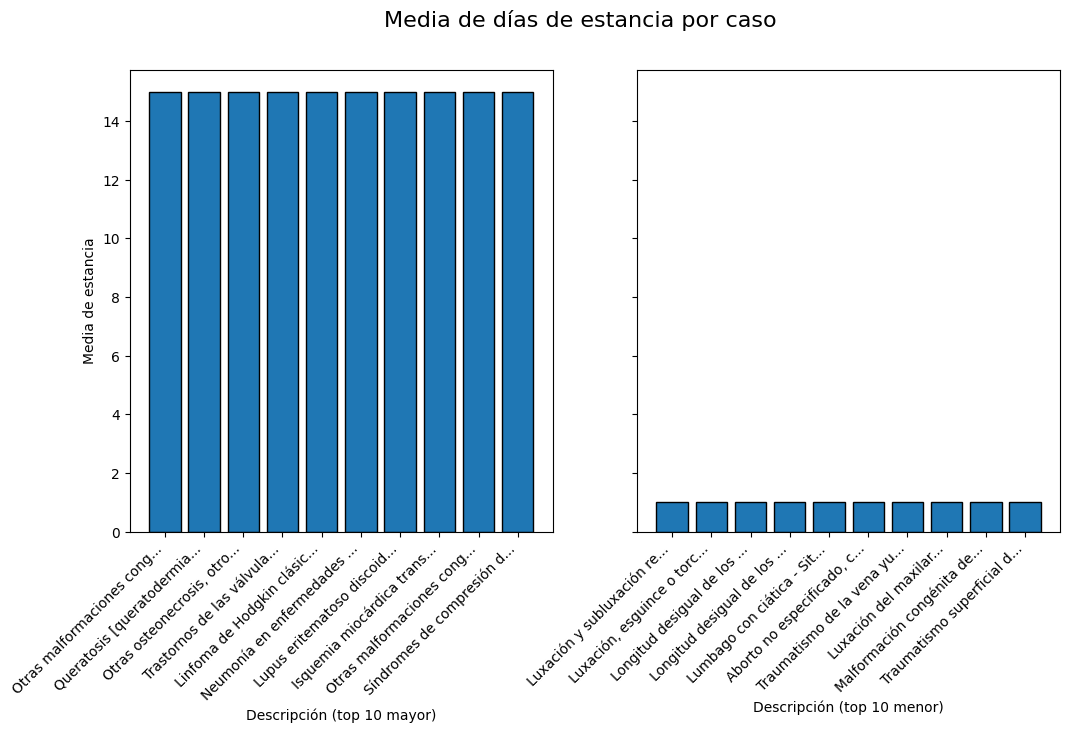

In [322]:
des_grp = (
    df
    .groupby('Descripción')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending=False)
)

# 2) Mostrar tabla con el top 10 más alto
print("Top 10 casos por promedio de estancia:")
display(des_grp.head(10))

# 3) Mostrar tabla con el top 10 más bajo
print("Top 10 casos con menor promedio de estancia:")
display(des_grp.tail(10))


# 4) Gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(12, 6))
fig.suptitle("Media de días de estancia por caso", fontsize = 16)

ax1.bar(des_grp['Descripción'].astype(str).head(10), des_grp['PROM_DIAS_ESTANCIA'].head(10), edgecolor='black')
ax1.set(xlabel = "Descripción (top 10 mayor)", ylabel = "Media de estancia")

ax2.bar(des_grp['Descripción'].astype(str).tail(10), des_grp['PROM_DIAS_ESTANCIA'].tail(10), edgecolor='black')
ax2.set(xlabel = "Descripción (top 10 menor)")

for ax in fig.axes:
    ax.set_xticklabels([label.get_text()[:25]+"..." for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.show()

En este caso, es claro que según la causa (o descripción del diagnóstico) existe una diferencia en la cantidad de días de hospitalización.

- Media por severidad

Promedio de DIAS_ESTANCIA por IR_29301_SEVERIDAD:


,IR_29301_SEVERIDAD,PROM_DIAS_ESTANCIA
3,3.0,5.845803
2,2.0,4.546151
1,1.0,3.211362
0,0.0,1.032237


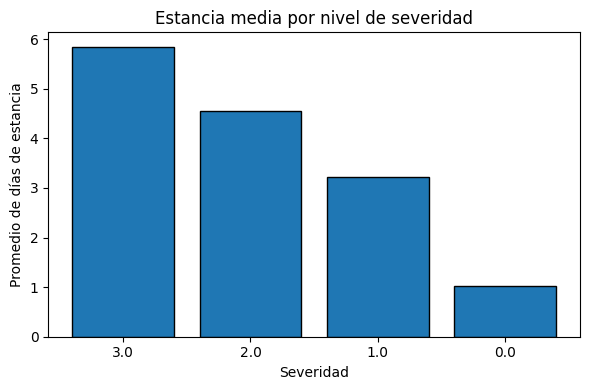

In [302]:
sev_grp = (
    df
    .groupby('IR_29301_SEVERIDAD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por IR_29301_SEVERIDAD:")
display(sev_grp)

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sev_grp['IR_29301_SEVERIDAD'].astype(str), sev_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('Severidad')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por nivel de severidad')
plt.tight_layout()
plt.show()

Al igual que en las descripciones, hay una clara diferencia en los distintos niveles de severidad respecto a la media de estancia.

- Media por mortalidad

Promedio de DIAS_ESTANCIA por IR_29301_MORTALIDAD:


,IR_29301_MORTALIDAD,PROM_DIAS_ESTANCIA
3,3.0,5.828425
2,2.0,5.253652
1,1.0,3.394692
0,0.0,1.032237


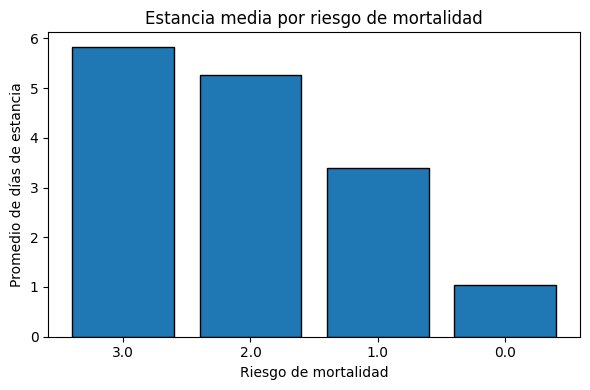

In [303]:
mort_grp = (
    df
    .groupby('IR_29301_MORTALIDAD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por IR_29301_MORTALIDAD:")
display(mort_grp)

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(mort_grp['IR_29301_MORTALIDAD'].astype(str), mort_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('Riesgo de mortalidad')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por riesgo de mortalidad')
plt.tight_layout()
plt.show()

Similar a la severidad, hay una clara diferencia en los distintos niveles de mortalidad respecto a la media de estancia.

#### 2. IR_29301_SEVERIDAD
- Métricas

In [203]:
array = np.array(df["IR_29301_SEVERIDAD"])
print('IR_29301_SEVERIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_SEVERIDAD

---------------------------------------------------------------------------

Mínimo:              0.0
10%:                 1.0
25%:                 1.0
Mediana:             2.0
75%:                 2.0
90%:                 3.0
Máximo:              3.0
Promedio:            1.74
Desviación Estandar: 0.84

---------------------------------------------------------------------------



#### 3. IR_29301_MORTALIDAD
- Métricas

In [204]:
array = np.array(df["IR_29301_MORTALIDAD"])
print('IR_29301_MORTALIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_MORTALIDAD

---------------------------------------------------------------------------

Mínimo:              0.0
10%:                 1.0
25%:                 1.0
Mediana:             1.0
75%:                 2.0
90%:                 3.0
Máximo:              3.0
Promedio:            1.57
Desviación Estandar: 0.83

---------------------------------------------------------------------------



#### 4. Descripción 
métricas principales

In [ ]:
# Agrupar, para facilitar el cálculo de las métricas
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('IR_29301_MORTALIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["Descripción"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_MORTALIDAD

---------------------------------------------------------------------------

Cantidad de únicos:  5341
Más Repetido:        Apendicitis aguda, otra y no especificada
Veces Repetido:      4412

---------------------------------------------------------------------------



10 más repetidos

,Apariciones
Descripción,
"Apendicitis aguda, otra y no especificada",4412
Desgarro perineal de primer grado durante el parto,3931
"Parto único espontáneo, presentación cefálica de vértice",3062
Atención materna por cicatriz uterina debida a cirugía previa,3043
Cálculo de la vesícula biliar con colecistitis aguda,2801
Cálculo de la vesícula biliar sin colecistitis,2572
Nefritis tubulointersticial aguda,2480
"Ruptura prematura de las membranas, e inicio del trabajo de parto dentro de las 24 horas",2285
Neumonía debida a virus sincitial respiratorio,2217


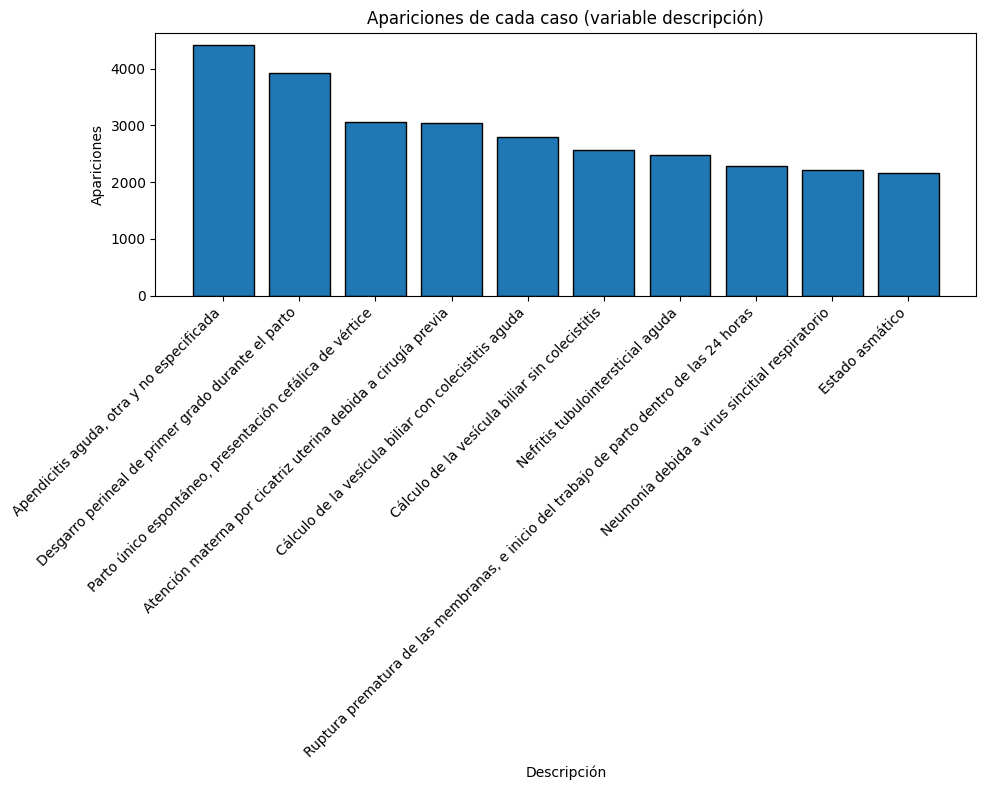

In [275]:
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False).head(10)

display(rep)

rep = rep.reset_index(names='Descripción')

plt.figure(figsize=(10,8))
plt.bar(rep['Descripción'].astype(str), rep['Apariciones'], edgecolor='black')
plt.xlabel('Descripción')
plt.ylabel('Apariciones')
plt.title('Apariciones de cada caso (variable descripción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Boxplot variables MORTALIDAD y SEVERIDAD

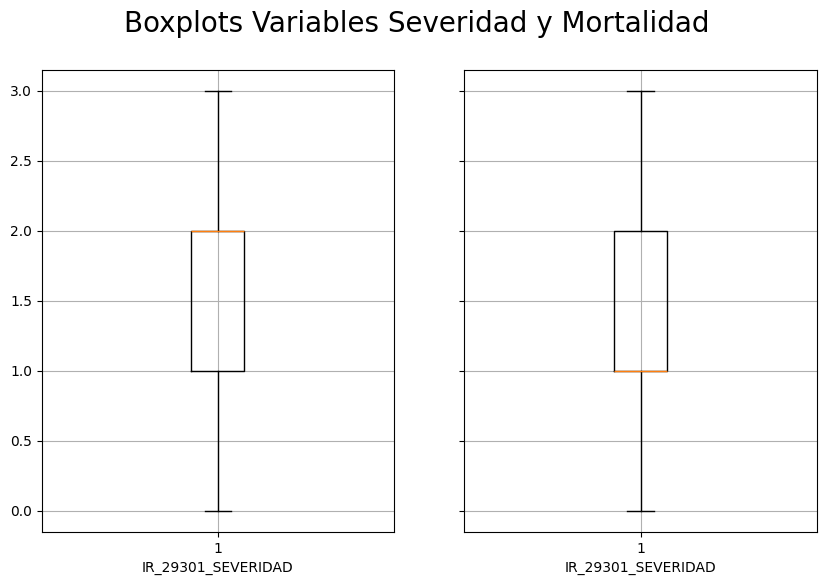

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10, 6)
fig.suptitle("Boxplots Variables Severidad y Mortalidad", fontsize=20)

ax1.boxplot(data = df, x='IR_29301_SEVERIDAD')
ax1.set(xlabel = "IR_29301_SEVERIDAD")
ax1.grid()

ax2.boxplot(data = df, x='IR_29301_MORTALIDAD')
ax2.set(xlabel = "IR_29301_SEVERIDAD")
ax2.grid()

plt.show()

Complemento a las métricas de los cuartiles, de manera visual

#### Boxplot variable DIAS_ESTANCIA

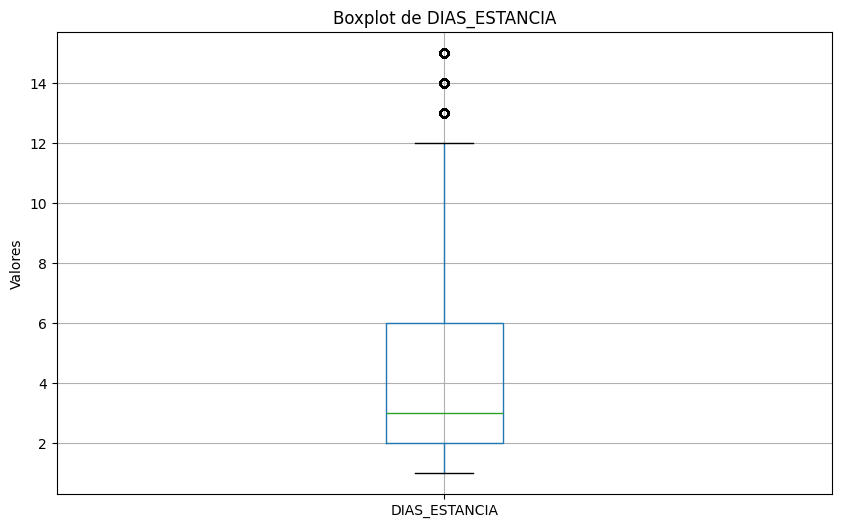

In [292]:
fig = plt.figure(figsize=(10, 6))

df.boxplot(column='DIAS_ESTANCIA')
plt.ylabel("Valores")
plt.title("Boxplot de DIAS_ESTANCIA")
plt.show()

Similar al boxplot anterior, complementar la información con los cuartiles respectivos.

### Correlaciones de las variables.
#### Separación entre variables categoricas y numéricas.
De esta manera, se pueden hacer las correlaciones:
- categoria-número
- categoría-categoría
- número-número

In [ ]:
# Separación de variables categóricas y numéricas
df_copy = df.copy()
obj = []
num = []

# Transformación a objetos categóricos
for i in df_copy.columns:
    if df_copy[i].dtype == "object":
        obj.append(i)
        df_copy[i] = pd.Categorical(df_copy[i])
    else:
        num.append(i)
obj2 = obj

df_copy_cat = df_copy[obj]
df_copy_num = df_copy[num]

### Correlación entre variables categóricas y numéricas.
Eta cuadrado se usa metrica del ANOVA (análisis de varianzas). Es utilizada para poder calcular la corerlacion (el nivel de explicación de la desviación estandar de variable respecto a otra variable). En este caso, es la más útil y acertada al momento de trabajar con variables categóricas y numéricas. Utiliza la suma de los cuadrados entre grupos y la suma total de los cuadrados.

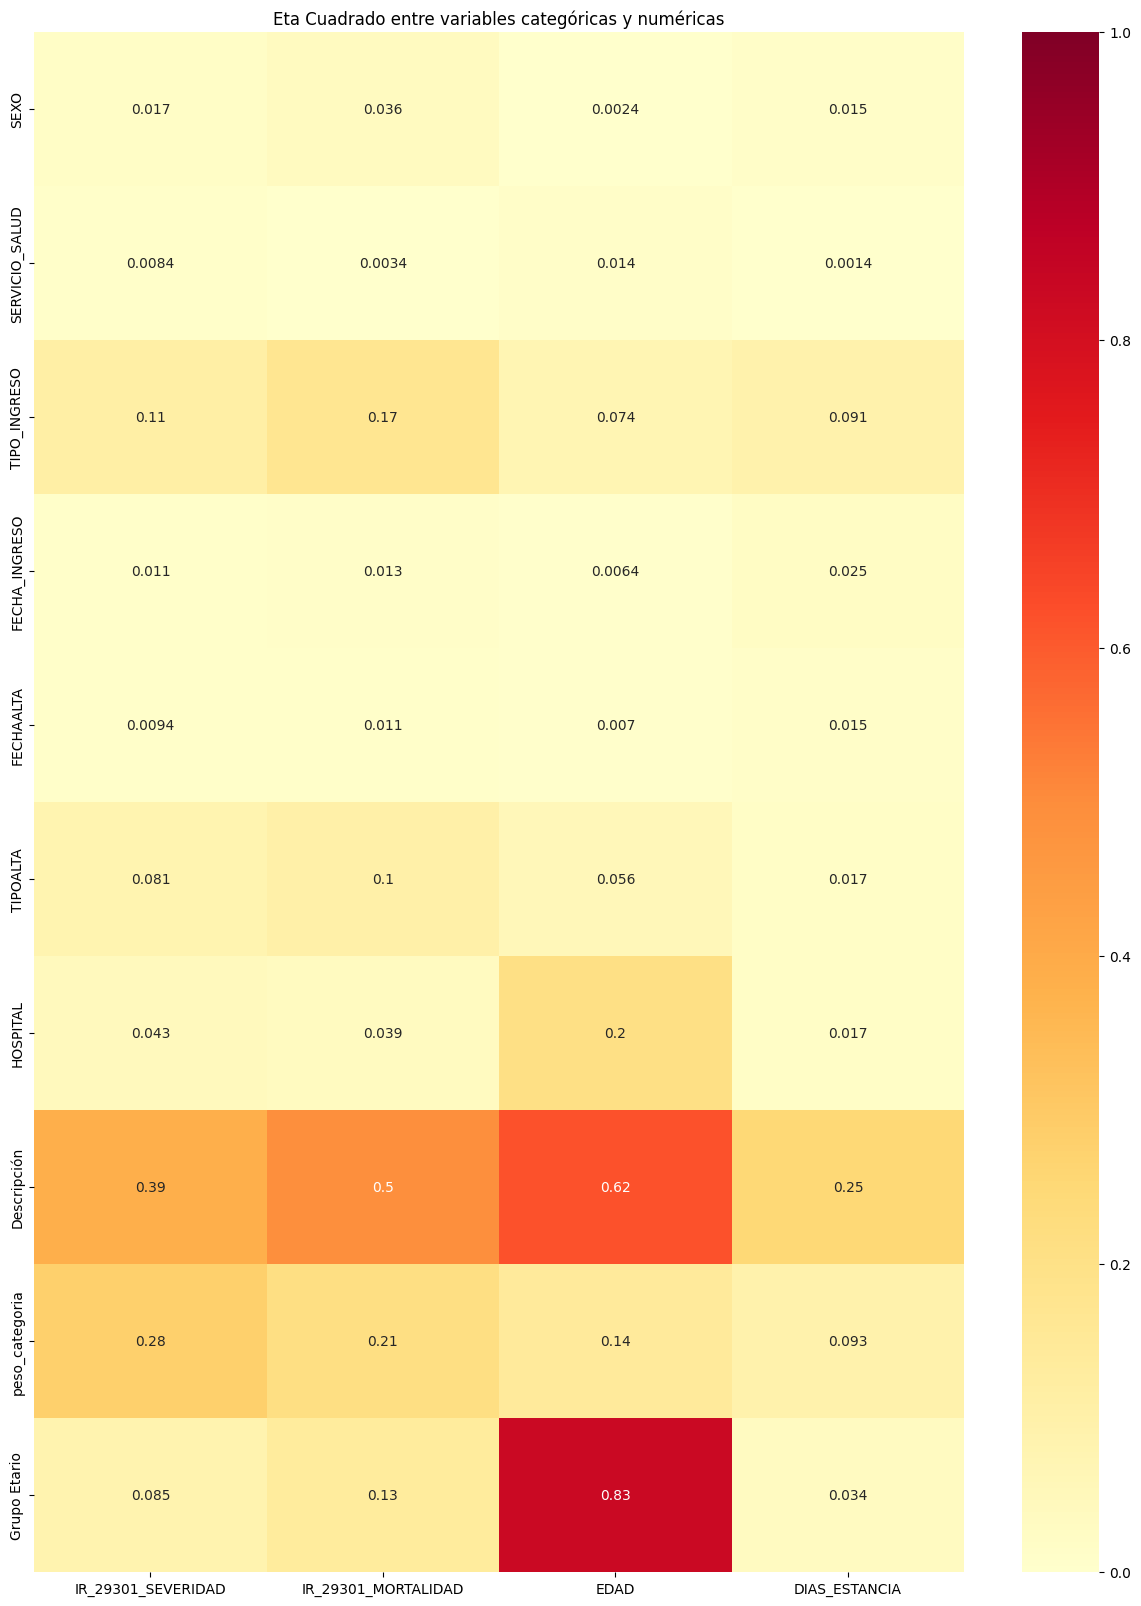

In [ ]:

# Función para calcular el Eta caudrado
def eta_squared(df, num_col, cat_col):
    categories = df[cat_col].unique()
    grand_mean = df[num_col].mean()
    ss_between = sum(
        len(df[df[cat_col] == cat]) * (df[df[cat_col] == cat][num_col].mean() - grand_mean) ** 2
        for cat in categories
    )
    ss_total = sum((df[num_col] - grand_mean) ** 2)
    return ss_between / ss_total

# Se define la matriz vacía
corr_matrix = pd.DataFrame(index = obj, columns = num)

# Se asignan los valores aplicando la función definida
for i in obj:
    for j in num:
        eta = eta_squared(df_copy, j, i)
        corr_matrix.loc[i, j] = eta

# Estandarización de la matriz
corr_matrix = corr_matrix.astype(float)
corr_matrix = corr_matrix.fillna(0)

# plot de la matriz
fig = plt.figure(figsize=(15,20))
sns.heatmap(corr_matrix, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Eta Cuadrado entre variables categóricas y numéricas")
plt.savefig("corr_cat_num.png", dpi = 300, bbox_inches = "tight")
plt.show()


Ignorando lo obvio (la clara correlación entre edad y grupo etario) se puede observar que descripción es una variable que tiene (en comparación a otras variables), una correlación alta con las variables numéricas, sobretodo con Mortalidad y con la Edad (Esto se puede explicar a que hay enferemedades que afectan más y con una mayor intencidad a diferentes grupos etarios).

### Correlación solo entre variables categóricas.

Para la medida de correlación se de variables categóricas se usa Cramer's V, que mide la fortaleza de la relación sin dirección, es decir, indica que tan realcionadas están las variables, pero sin decir si es de manera positiva o negativa (debido a que no son valores númericos, no tendría sentido una relación "negativa") Para su calculo se utiliza el Chi cuadrado, la cantidad de observaciones y el menor numero entre las filas y las columnas.

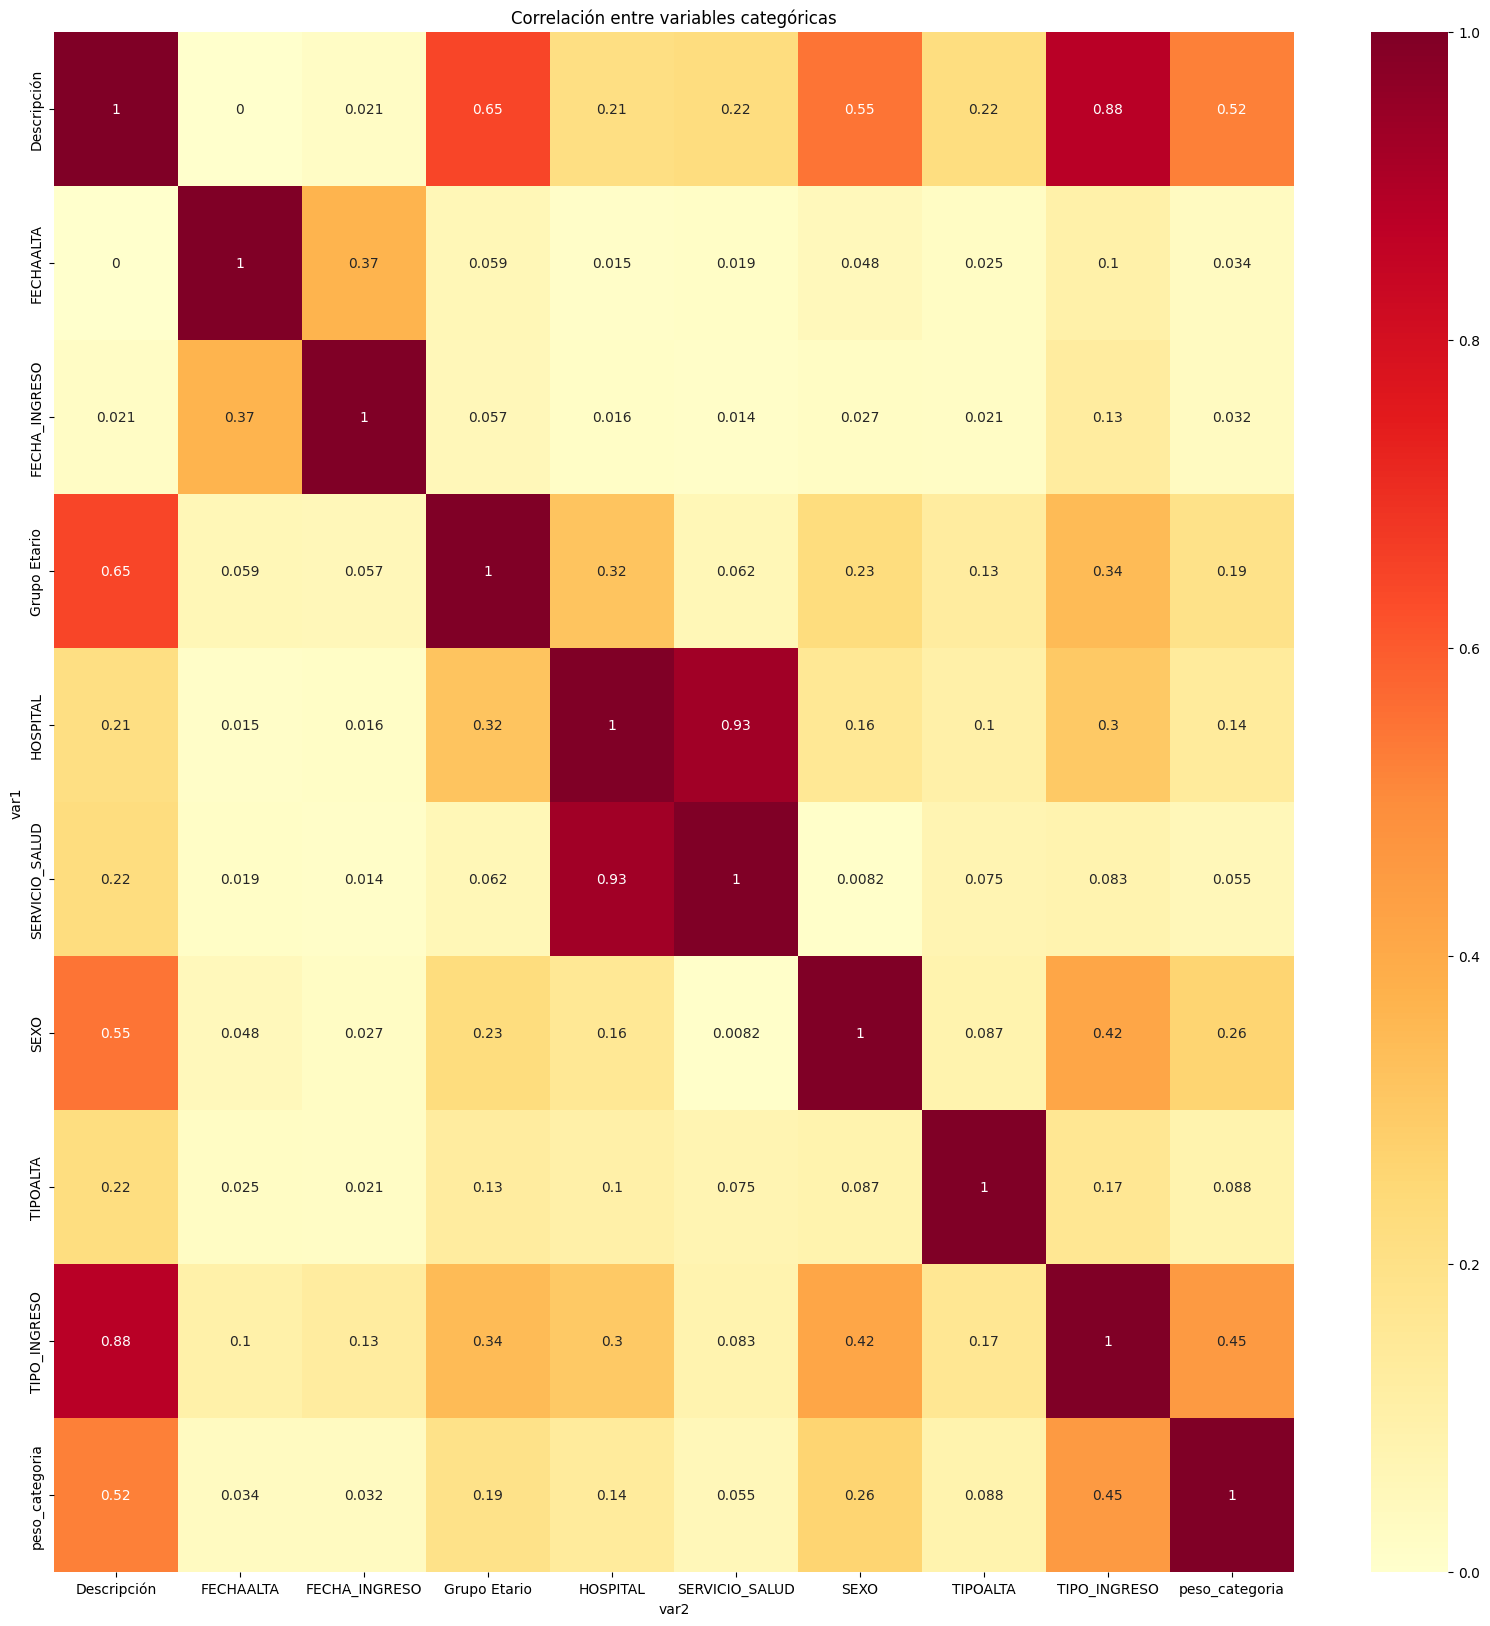

In [198]:
cat_var_prod = list(it.product(obj,obj2, repeat = 1))
result = []

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for i in cat_var_prod:
    result.append((i[0], i[1], cramers_v(df_copy_cat[i[0]], df_copy_cat[i[1]])))

corr_output = pd.DataFrame(result, columns = ["var1", "var2", "Corr"])
corr_output = corr_output.pivot(index = "var1", columns="var2", values = "Corr")
corr_output = corr_output.astype(float)

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_output, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables categóricas")
plt.savefig("corr_cat_cat.png", dpi = 300, bbox_inches = "tight")
plt.show()


Debido a la cantidad de variables, nos centraremos en las que consideremos más importantes. La descripción se correlaciona con grupo etario (era de esperarse, debido al resultado de las correlaciones anteriores), pero además, tiene una alta correlación con sexo, tipo ingreso y con el peso del GRD. Además tiene una correlación media-debil con el Hospital, el servisio de salud y el tipo del alta.

### Correlación variables numéricas.

En este caso, se usa el metodo de correlación proveniente de la librería de pandas.

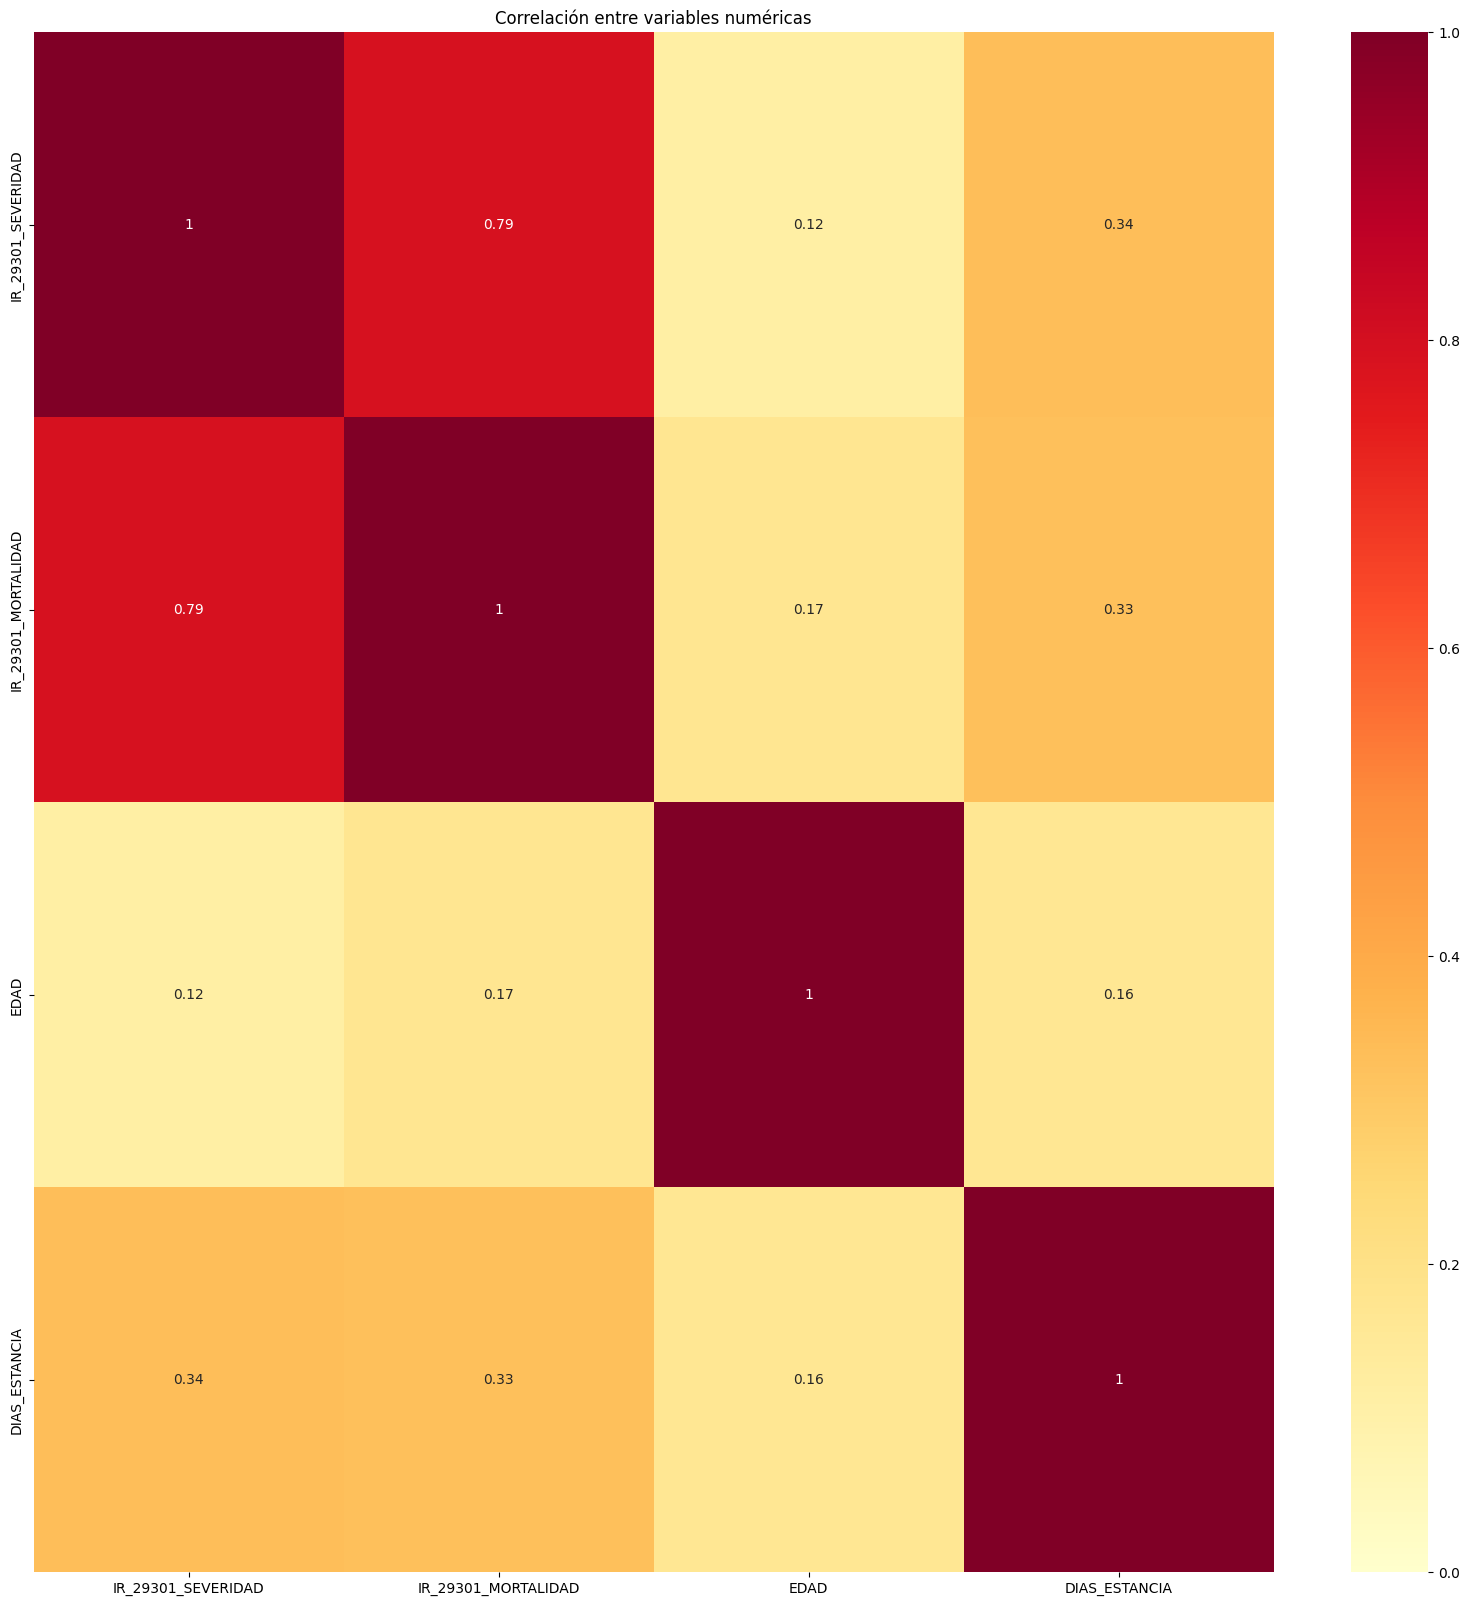

In [ ]:
correlations = df_copy_num.corr(method = "pearson")

# Plot de la matriz
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables numéricas")
plt.savefig("corr_num_num.png", dpi = 300, bbox_inches = "tight")
plt.show()

Tal como se había esperado, en las variables numéricas, las más significativas en terminos de correlación dson la Mortalidad y la Severidad del caso, aunque no en un nivel tan alto como esperado. Además, en un resultado esperable, se tiene que la mortalidad y la severidad el caso estan fuertemente correlacionadas.

#### Correlaciones con las variables importantes elegidas.

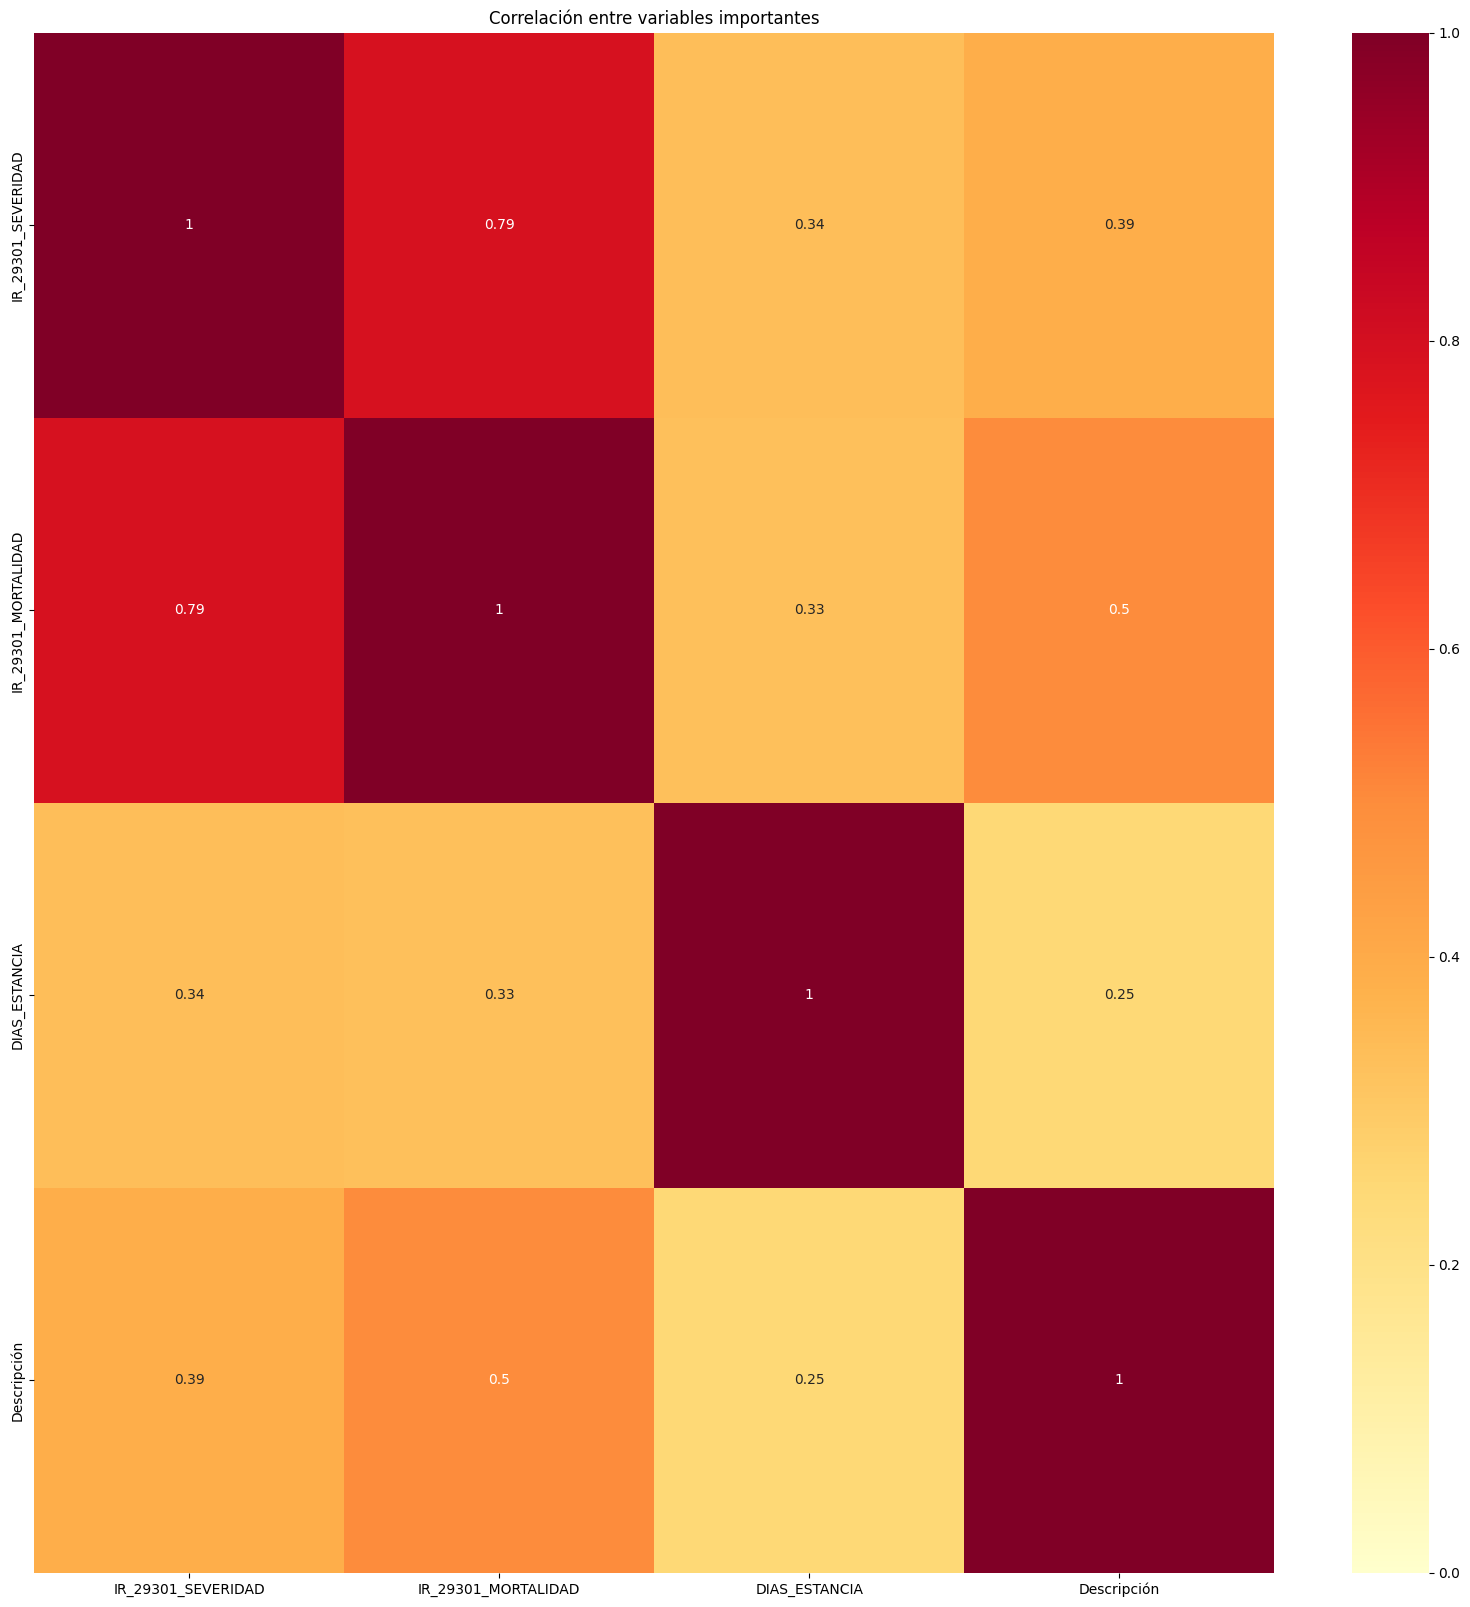

In [ ]:
# Se calcula la correlación entre las variables numéricas
correlations = df_copy_num.corr(method = "pearson")

# Se elimina la variable no considerada en las variables importantes.
correlations.drop("EDAD", inplace = True)
correlations.drop(columns = ["EDAD"], axis = 1, inplace = True)

# Se agregan las observaciones de la variable categorica considerada como importante, calculados anteriormente.
correlations["Descripción"] = np.array([0.39, 0.5, 0.25])
correlations.loc['Descripción'] = [0.39, 0.5, 0.25, 1.0]

#plot de la matriz
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables importantes")
plt.savefig("corr_importantes.png", dpi = 300, bbox_inches = "tight")
plt.show()

No hay conclusiones nuevas, debido a que este gráfico es la unión de las correlaciones ya mostradas anteriormente, pero mostrando solo la de las variables elegidas. Lo que si es importante observar, es que en este caso, todas las correlaciones son sobre 0.25 respecto a la variable objetivo, lo que significa que las variables, efectivamente, explican de cierta manera la variable objetivo.

Por último, y como conclusiones finales de las correlaciones, las otras variables no se correlacionan tanto entre si, lo que podría ser bastante útil al momento de hacer un modelo de predicción, ya que se evita la multicolinealidad (que es perjudicial al momento de hacer tales modelos).